In [4]:
# importing
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import TargetEncoder

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r'/kaggle/input/playground-series-s5e4/train.csv')
te=pd.read_csv(r'/kaggle/input/playground-series-s5e4/test.csv')
tte=te.copy()

In [6]:
df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [7]:
te

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative
249996,999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2.0,Negative
249997,999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1.0,Neutral
249998,999998,Market Masters,Episode 46,113.46,Business,43.47,Friday,Night,93.59,3.0,Positive


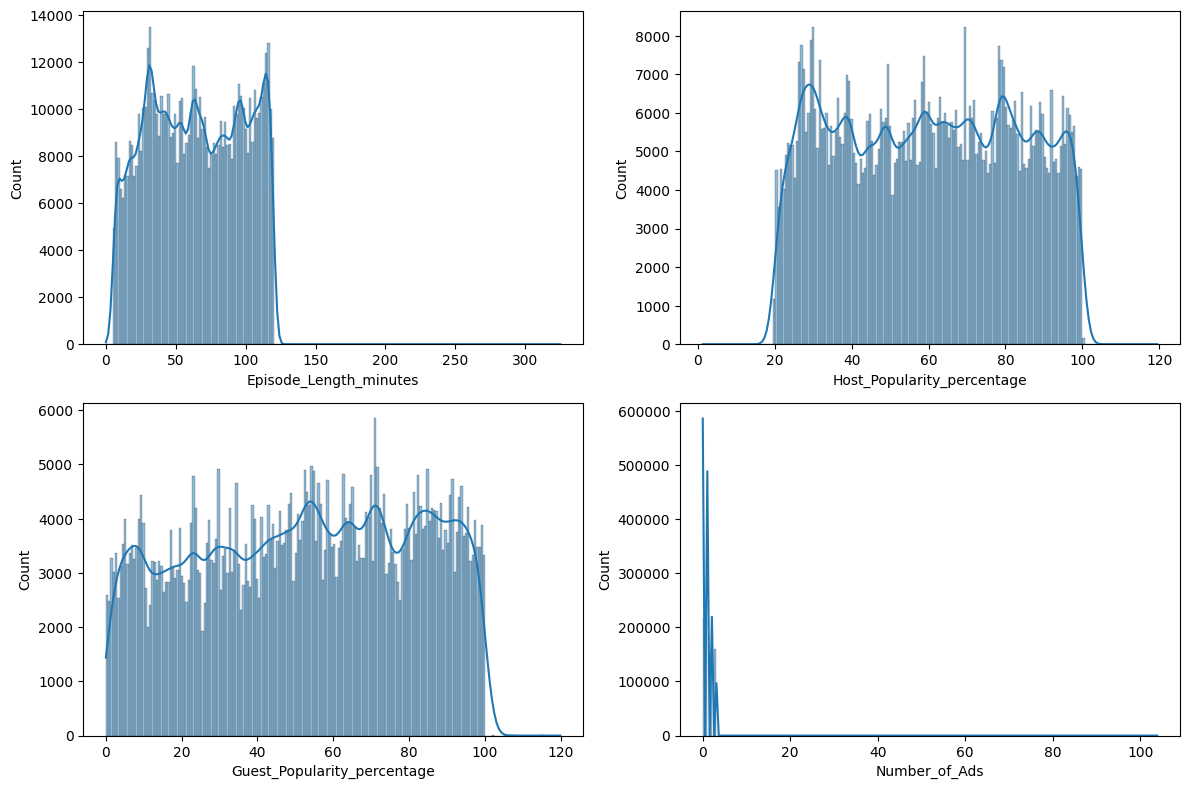

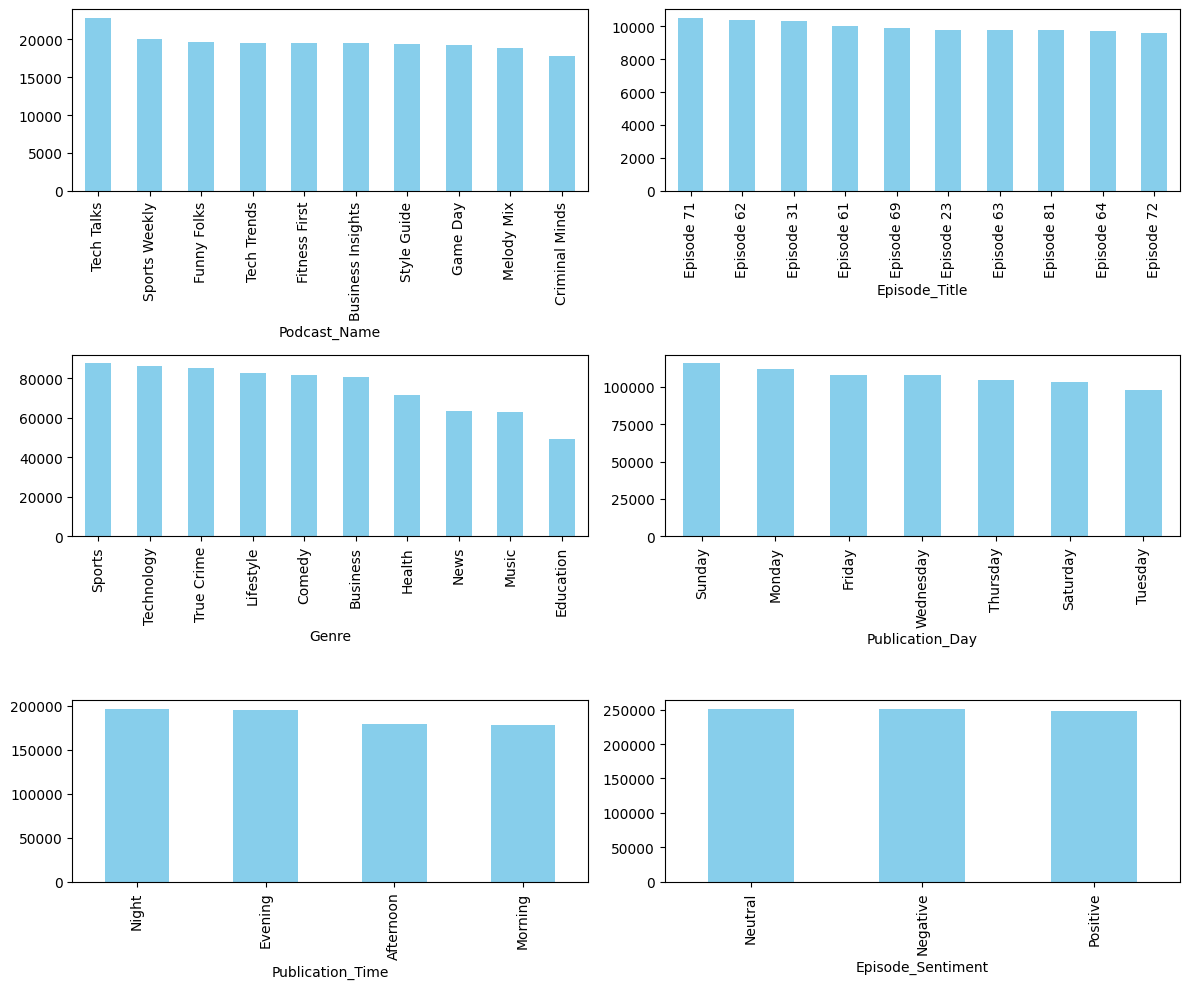

In [8]:
numerical_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
categorical_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), bins=200, kde=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.tight_layout()
plt.show()

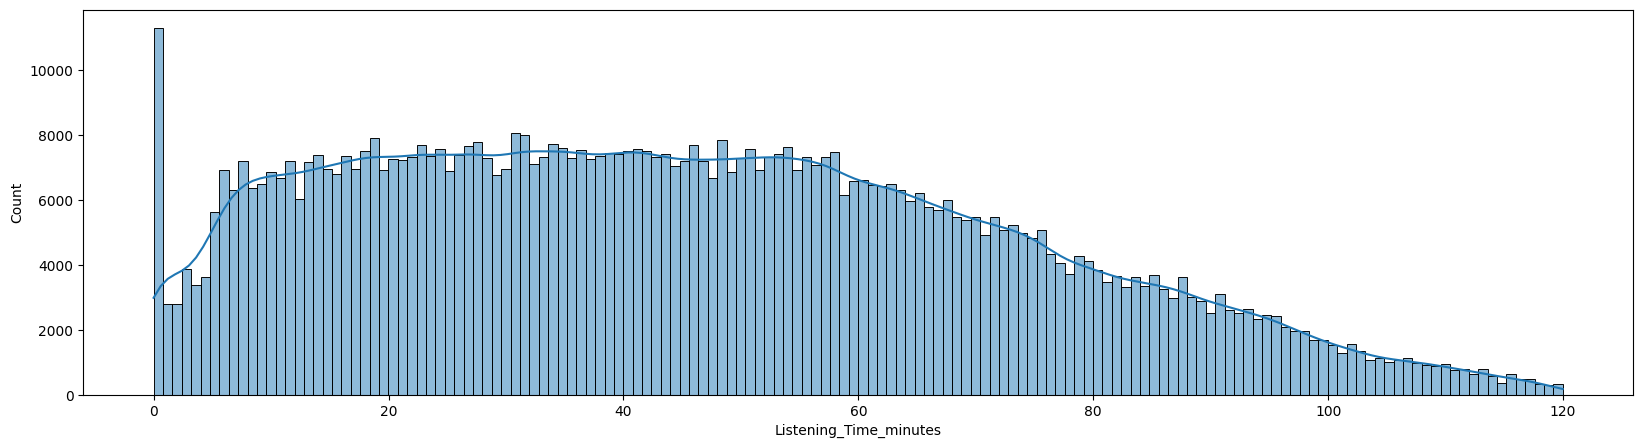

In [9]:
plt.figure(figsize=(20,5))
sns.histplot(df['Listening_Time_minutes'], bins=150, kde=True)
plt.show()

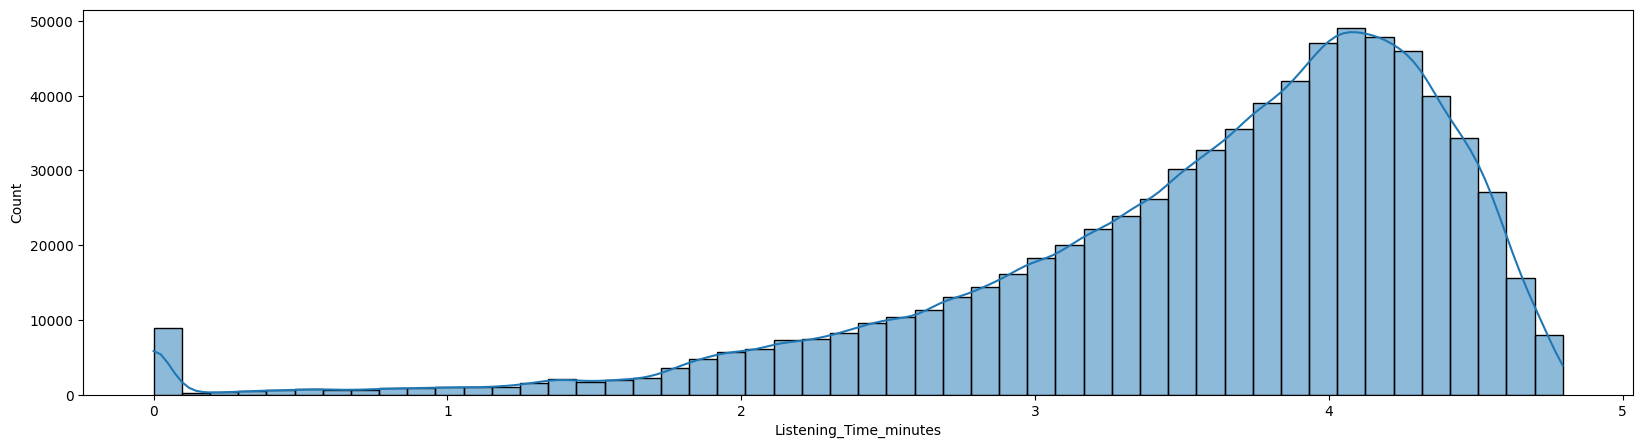

In [10]:
plt.figure(figsize=(20,5))
sns.histplot(np.log1p(df['Listening_Time_minutes']), bins=50, kde=True)
plt.show()

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


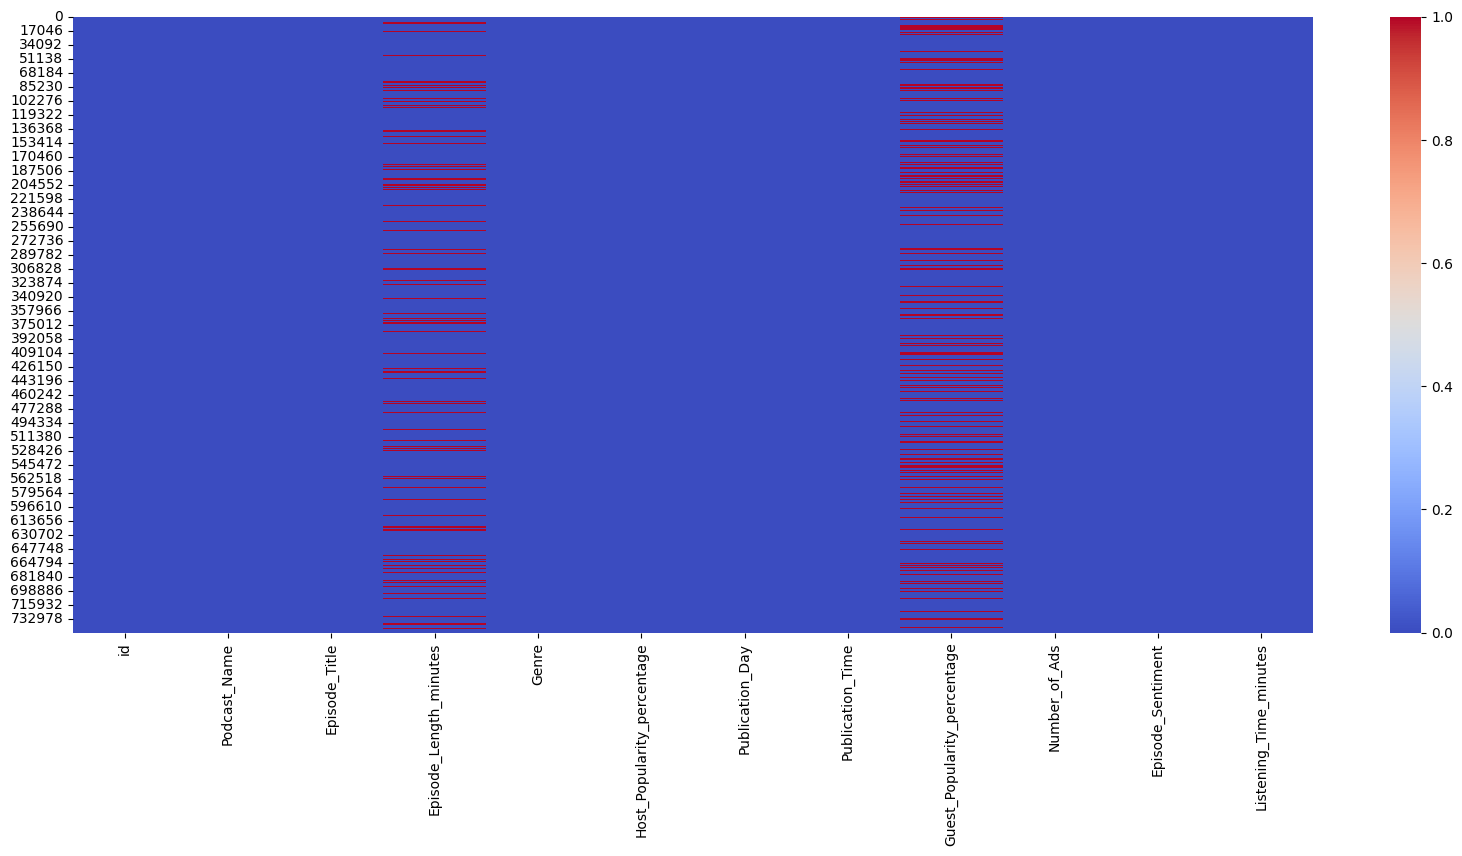

In [12]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.isnull(), cmap="coolwarm") 
plt.show()

In [13]:
df['Episode_Length_minutes']=df['Episode_Length_minutes'].fillna(df['Episode_Length_minutes'].median())
df['Guest_Popularity_percentage']=df['Guest_Popularity_percentage'].fillna(df['Guest_Popularity_percentage'].median())

df["Number_of_Ads"] = df["Number_of_Ads"].fillna(0).astype(int)
mode_value = df["Number_of_Ads"].mode()[0]  
df["Number_of_Ads"] = df["Number_of_Ads"].fillna(mode_value).astype(int)

In [14]:
te.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


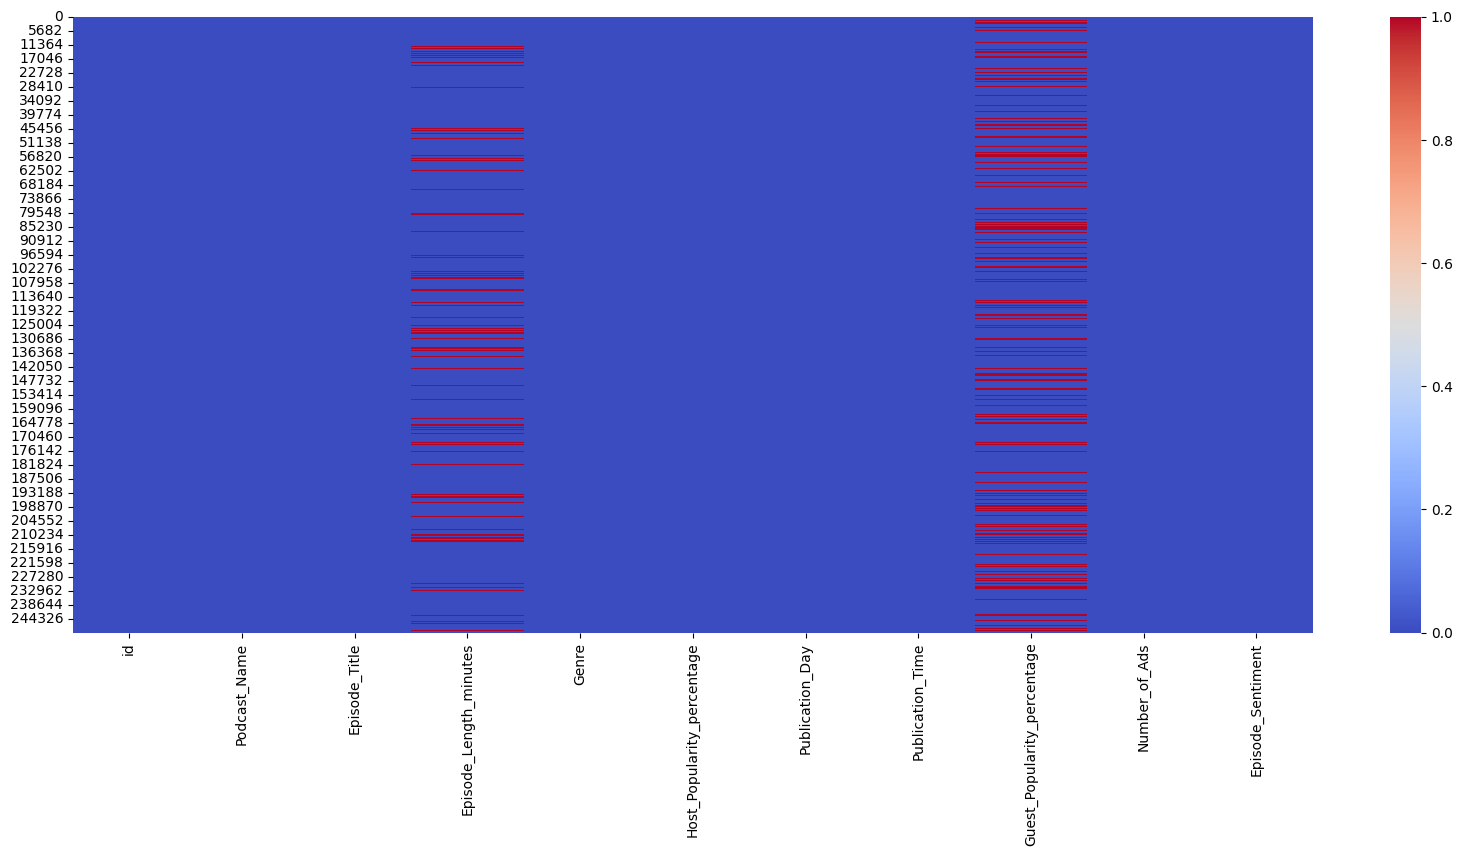

In [15]:
plt.figure(figsize=(20, 8))
sns.heatmap(te.isnull(), cmap="coolwarm") 
plt.show()

In [16]:
te['Episode_Length_minutes']=te['Episode_Length_minutes'].fillna(te['Episode_Length_minutes'].median())
te['Guest_Popularity_percentage']=te['Guest_Popularity_percentage'].fillna(te['Guest_Popularity_percentage'].median())

te["Number_of_Ads"] = te["Number_of_Ads"].fillna(0).astype(int)
mode_value = te["Number_of_Ads"].mode()[0]  
te["Number_of_Ads"] = te["Number_of_Ads"].fillna(mode_value).astype(int)

In [17]:
print(df.info(), te.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       750000 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  750000 non-null  float64
 9   Number_of_Ads                750000 non-null  int64  
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 68.7+ MB


In [18]:
from itertools import combinations  
from joblib import Parallel, delayed

In [19]:
df["Weekday"] = df["Publication_Day"].map({
    "Sunday": 0, 
    "Monday": 1, 
    "Tuesday": 2, 
    "Wednesday": 3, 
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
})
df["SinWeekday"] = np.sin(2 * np.pi * df["Weekday"] / 7)
df["CosWeekday"] = np.cos(2 * np.pi * df["Weekday"] / 7)
df["Time"] = df["Publication_Time"].map({
    "Morning": 0, 
    "Afternoon": 1, 
    "Evening": 2, 
    "Night": 3, 
})
df["SinTime"] = np.sin(2 * np.pi * df["Time"] / 4)
df["CosTime"] = np.cos(2 * np.pi * df["Time"] / 4)
df["Episode_Title"] = df["Episode_Title"].str.split(" ", expand=True)[1].astype(np.uint16)
df["Number_of_Ads"] = df["Number_of_Ads"].fillna(0).clip(0, 3).astype(np.uint8)
df["Episode_Length_minutes"] = df['Episode_Length_minutes'].fillna(60)
df['SinEpLen'] = np.sin(2 * np.pi * df['Episode_Length_minutes'] / 60)
df['CosEpLen'] = np.cos(2 * np.pi * df['Episode_Length_minutes'] / 60)
del df["Publication_Time"], df["Publication_Day"]
df["ELen_Int"] = np.floor(df["Episode_Length_minutes"])
df["ELen_Dec"] = df["Episode_Length_minutes"] - df["ELen_Int"]
cat_cols = [
    "Podcast_Name", "Episode_Title", "Genre", "Number_of_Ads", 
    "Episode_Sentiment", "ELen_Int"
]
df[cat_cols] = df[cat_cols].astype("string")
for col1, col2 in combinations(cat_cols, 2):
    df[f"{col1}-{col2}"] = df[col1] + "-" + df[col2]

In [20]:
te["Weekday"] = te["Publication_Day"].map({
    "Sunday": 0, "Monday": 1, "Tuesday": 2, "Wednesday": 3,
    "Thursday": 4, "Friday": 5, "Saturday": 6
})
te["SinWeekday"] = np.sin(2 * np.pi * te["Weekday"] / 7)
te["CosWeekday"] = np.cos(2 * np.pi * te["Weekday"] / 7)
te["Time"] = te["Publication_Time"].map({
    "Morning": 0, "Afternoon": 1, "Evening": 2, "Night": 3
})
te["SinTime"] = np.sin(2 * np.pi * te["Time"] / 4)
te["CosTime"] = np.cos(2 * np.pi * te["Time"] / 4)
te["Episode_Title"] = te["Episode_Title"].str.split(" ", expand=True)[1].astype(np.uint16)
te["Number_of_Ads"] = te["Number_of_Ads"].fillna(0).clip(0, 3).astype(np.uint8)
te["Episode_Length_minutes"] = te['Episode_Length_minutes'].fillna(60)
te['SinEpLen'] = np.sin(2 * np.pi * te['Episode_Length_minutes'] / 60)
te['CosEpLen'] = np.cos(2 * np.pi * te['Episode_Length_minutes'] / 60)
del te["Publication_Time"], te["Publication_Day"]
te["ELen_Int"] = np.floor(te["Episode_Length_minutes"])
te["ELen_Dec"] = te["Episode_Length_minutes"] - te["ELen_Int"]
te[cat_cols] = te[cat_cols].astype("string").fillna("missing")
for col1, col2 in combinations(cat_cols, 2):
    te[f"{col1}-{col2}"] = te[col1] + "-" + te[col2]

In [21]:
print(df.info(), te.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               750000 non-null  int64  
 1   Podcast_Name                     750000 non-null  string 
 2   Episode_Title                    750000 non-null  string 
 3   Episode_Length_minutes           750000 non-null  float64
 4   Genre                            750000 non-null  string 
 5   Host_Popularity_percentage       750000 non-null  float64
 6   Guest_Popularity_percentage      750000 non-null  float64
 7   Number_of_Ads                    750000 non-null  string 
 8   Episode_Sentiment                750000 non-null  string 
 9   Listening_Time_minutes           750000 non-null  float64
 10  Weekday                          750000 non-null  int64  
 11  SinWeekday                       750000 non-null  float64
 12  Co

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

train = df
test = te
string_cols = [col for col in train.columns if train[col].dtype == 'string']
encoders = {}

for col in string_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    encoders[col] = le
for col in string_cols:
    if col in test.columns:
        le = encoders[col]
        test[col] = test[col].astype(str).map(
            lambda x: x if x in le.classes_ else '-1'
        ).map(
            {val: idx for idx, val in enumerate(np.append(le.classes_, '-1'))}
        ).astype(int)

In [23]:
df=train.copy()
te=test.copy()

In [24]:
!pip install optuna --quiet



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [26]:
!pip install xgboost --quiet



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [28]:
!pip install lightgbm --quiet



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [29]:
import pandas as pd
import numpy as np
import optuna
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

try:
    import cudf
except ImportError:
    cudf = None

try:
    from optuna.integration import XGBoostPruningCallback, LightGBMPruningCallback
    has_optuna_integration = True
except ImportError:
    has_optuna_integration = False
    print("Warning: optuna-integration not found. Running without pruning callbacks.")
    print("Install with: pip install optuna-integration[xgboost,lightgbm]")

def preprocess_data(df, te, target_col='Listening_Time_minutes', use_gpu=True):
    df_local = cudf.from_pandas(df) if use_gpu and cudf else df
    te_local = cudf.from_pandas(te) if use_gpu and cudf else te
    quantiles = df_local[target_col].quantile([0.25, 0.75])
    if cudf and use_gpu:
        quantiles = quantiles.to_pandas().tolist()
        Q1, Q3 = quantiles[0], quantiles[1]
    else:
        Q1, Q3 = quantiles
    IQR = Q3 - Q1
    bounds = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    if cudf and use_gpu:
        mask = df_local[target_col].between(left=bounds[0], right=bounds[1])
    else:
        mask = df_local[target_col].between(*bounds)
    X = df_local.loc[mask].drop(columns=target_col).astype('float32')
    y = df_local.loc[mask, target_col].astype('float32')
    X_test = te_local[X.columns].astype('float32')
    X_median = X.median()
    X_test = X_test.fillna(X_median)
    if use_gpu and cudf:
        X, y, X_test = X.to_pandas(), y.to_pandas(), X_test.to_pandas()
    print(f"Rows after outlier removal: {X.shape[0]} (original: {df.shape[0]})")
    return X, y, X_test

def xgb_objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'tree_method': 'hist',
        'gpu_id': 0 if cudf else -1,
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True),
        'random_state': 42,
        'n_jobs': -1,
    }
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
    dtrain = xgb.DMatrix(X_train, y_train, nthread=-1)
    dval = xgb.DMatrix(X_val, y_val, nthread=-1)
    callbacks = [XGBoostPruningCallback(trial, 'val-rmse')] if has_optuna_integration else None
    model = xgb.train(params, dtrain, num_boost_round=1000,
                      evals=[(dval, 'val')], early_stopping_rounds=50,
                      verbose_eval=False, callbacks=callbacks)
    pred_val = model.predict(dval)
    mse = np.mean((y_val - pred_val) ** 2)
    return mse

def lgb_objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'mse',
        'boosting_type': 'gbdt',
        'device': 'gpu' if cudf else 'cpu',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True),
        'random_state': 42,
        'n_jobs': -1,
    }
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)
    callbacks = [LightGBMPruningCallback(trial, 'mse')] if has_optuna_integration else None
    model = lgb.train(params, dtrain, num_boost_round=1000,
                      valid_sets=[dval], callbacks=callbacks)
    pred_val = model.predict(X_val)
    mse = np.mean((y_val - pred_val) ** 2)
    return mse

X, y, X_test = preprocess_data(df, te)

study_xgb = optuna.create_study(direction='minimize', 
                                pruner=optuna.pruners.MedianPruner() if has_optuna_integration else None)
study_xgb.optimize(xgb_objective, n_trials=30, timeout=1800)
best_params_xgb = study_xgb.best_params
best_params_xgb.update({
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'gpu_id': 0 if cudf else -1,
    'random_state': 42,
    'n_jobs': -1
})
print("Best XGBoost Params:", best_params_xgb)

study_lgb = optuna.create_study(direction='minimize', 
                                pruner=optuna.pruners.MedianPruner() if has_optuna_integration else None)
study_lgb.optimize(lgb_objective, n_trials=30, timeout=1800)
best_params_lgb = study_lgb.best_params
best_params_lgb.update({
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'device': 'gpu' if cudf else 'cpu',
    'random_state': 42,
    'n_jobs': -1
})
print("Best LightGBM Params:", best_params_lgb)

Install with: pip install optuna-integration[xgboost,lightgbm]
Rows after outlier removal: 750000 (original: 750000)


[I 2025-04-03 08:38:45,502] A new study created in memory with name: no-name-35414e37-0480-47a2-a260-99fc4f30c934
[I 2025-04-03 08:39:02,537] Trial 0 finished with value: 166.904296875 and parameters: {'learning_rate': 0.09471862584740436, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8347381165936417, 'colsample_bytree': 0.8115630904043865, 'reg_alpha': 0.36622437236749084, 'reg_lambda': 0.7209854747008999}. Best is trial 0 with value: 166.904296875.
[I 2025-04-03 08:39:44,189] Trial 1 finished with value: 163.10487365722656 and parameters: {'learning_rate': 0.019661170123954175, 'max_depth': 10, 'min_child_weight': 9, 'subsample': 0.8743424100446013, 'colsample_bytree': 0.818168808026488, 'reg_alpha': 0.0008512657328123028, 'reg_lambda': 0.007713356985287056}. Best is trial 1 with value: 163.10487365722656.
[I 2025-04-03 08:39:52,518] Trial 2 finished with value: 167.03237915039062 and parameters: {'learning_rate': 0.22872915699275567, 'max_depth': 7, 'min_child_weight': 6, '

Best XGBoost Params: {'learning_rate': 0.038081381846621194, 'max_depth': 10, 'min_child_weight': 9, 'subsample': 0.9296049809770375, 'colsample_bytree': 0.8295250753939027, 'reg_alpha': 0.0002465082391153164, 'reg_lambda': 0.0330045553031665, 'objective': 'reg:squarederror', 'tree_method': 'hist', 'gpu_id': -1, 'random_state': 42, 'n_jobs': -1}


[I 2025-04-03 08:53:32,613] A new study created in memory with name: no-name-7012efdd-3153-4e97-aa64-87dedbd6938d


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-04-03 08:54:17,909] Trial 0 finished with value: 166.36543511455966 and parameters: {'learning_rate': 0.18060199860131687, 'max_depth': 5, 'min_child_weight': 5, 'num_leaves': 62, 'subsample': 0.7770695016394614, 'colsample_bytree': 0.7769583535287601, 'reg_alpha': 0.001222402630243518, 'reg_lambda': 0.0028593639515648735}. Best is trial 0 with value: 166.36543511455966.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 08:55:01,738] Trial 1 finished with value: 169.56632431789157 and parameters: {'learning_rate': 0.012076516914840116, 'max_depth': 6, 'min_child_weight': 1, 'num_leaves': 57, 'subsample': 0.7459282143746738, 'colsample_bytree': 0.8678900022028715, 'reg_alpha': 0.0005575002788101718, 'reg_lambda': 1.1322173976282046}. Best is trial 0 with value: 166.36543511455966.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-04-03 08:56:11,408] Trial 2 finished with value: 165.51117438888974 and parameters: {'learning_rate': 0.05806663284364805, 'max_depth': 8, 'min_child_weight': 8, 'num_leaves': 104, 'subsample': 0.8499380857959633, 'colsample_bytree': 0.9308375709464582, 'reg_alpha': 0.0001177722184840178, 'reg_lambda': 0.0043549354783222576}. Best is trial 2 with value: 165.51117438888974.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-04-03 08:56:51,057] Trial 3 finished with value: 169.92406773496768 and parameters: {'learning_rate': 0.07538648727865353, 'max_depth': 3, 'min_child_weight': 2, 'num_leaves': 57, 'subsample': 0.828114842253165, 'colsample_bytree': 0.9570751119029914, 'reg_alpha': 0.030279504369141792, 'reg_lambda': 0.548487923323846}. Best is trial 2 with value: 165.51117438888974.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 08:57:16,226] Trial 4 finished with value: 170.57006913771036 and parameters: {'learning_rate': 0.022586139532242682, 'max_depth': 4, 'min_child_weight': 6, 'num_leaves': 117, 'subsample': 0.9361066334916635, 'colsample_bytree': 0.776074621176013, 'reg_alpha': 5.024091577046814e-05, 'reg_lambda': 0.01790669231143699}. Best is trial 2 with value: 165.51117438888974.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 08:57:33,192] Trial 5 finished with value: 170.37910004855604 and parameters: {'learning_rate': 0.027582322141922307, 'max_depth': 4, 'min_child_weight': 1, 'num_leaves': 38, 'subsample': 0.9276235686930637, 'colsample_bytree': 0.701239512820768, 'reg_alpha': 0.0048732829457880066, 'reg_lambda': 0.00030287624042048635}. Best is trial 2 with value: 165.51117438888974.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 08:58:26,494] Trial 6 finished with value: 165.51839176695538 and parameters: {'learning_rate': 0.21475585264558086, 'max_depth': 7, 'min_child_weight': 9, 'num_leaves': 115, 'subsample': 0.837820950758727, 'colsample_bytree': 0.8611585625595096, 'reg_alpha': 0.0021235341679391915, 'reg_lambda': 4.96563347363982}. Best is trial 2 with value: 165.51117438888974.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-04-03 08:59:23,823] Trial 7 finished with value: 172.23245971783956 and parameters: {'learning_rate': 0.0060397839600140855, 'max_depth': 4, 'min_child_weight': 3, 'num_leaves': 127, 'subsample': 0.7465676585876146, 'colsample_bytree': 0.8762767210567454, 'reg_alpha': 0.04325084278636228, 'reg_lambda': 9.422145684431918}. Best is trial 2 with value: 165.51117438888974.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:00:13,808] Trial 8 finished with value: 167.04063056540932 and parameters: {'learning_rate': 0.06475468768551472, 'max_depth': 7, 'min_child_weight': 1, 'num_leaves': 42, 'subsample': 0.8092555000391628, 'colsample_bytree': 0.9941044026923971, 'reg_alpha': 3.2062859213010992, 'reg_lambda': 0.22917767721283394}. Best is trial 2 with value: 165.51117438888974.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 09:00:29,892] Trial 9 finished with value: 171.9964770303099 and parameters: {'learning_rate': 0.01526070803578491, 'max_depth': 3, 'min_child_weight': 8, 'num_leaves': 128, 'subsample': 0.9193440280669378, 'colsample_bytree': 0.9462721858826271, 'reg_alpha': 0.006068310364468767, 'reg_lambda': 0.010054263046057152}. Best is trial 2 with value: 165.51117438888974.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-03 09:01:22,240] Trial 10 finished with value: 165.22647848686952 and parameters: {'learning_rate': 0.0676478094916371, 'max_depth': 9, 'min_child_weight': 10, 'num_leaves': 94, 'subsample': 0.9929422946846489, 'colsample_bytree': 0.9206871094116805, 'reg_alpha': 3.890217437694562e-05, 'reg_lambda': 1.107949049678163e-05}. Best is trial 10 with value: 165.22647848686952.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:02:12,936] Trial 11 finished with value: 165.4834036702273 and parameters: {'learning_rate': 0.0665109073719681, 'max_depth': 10, 'min_child_weight': 10, 'num_leaves': 88, 'subsample': 0.9761585149174538, 'colsample_bytree': 0.9338070659942562, 'reg_alpha': 1.349470543439566e-05, 'reg_lambda': 1.0848571719027282e-05}. Best is trial 10 with value: 165.22647848686952.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:03:01,958] Trial 12 finished with value: 164.9488696812272 and parameters: {'learning_rate': 0.11705047726514607, 'max_depth': 10, 'min_child_weight': 10, 'num_leaves': 90, 'subsample': 0.9980420527593887, 'colsample_bytree': 0.9138373579802219, 'reg_alpha': 1.7922179266170287e-05, 'reg_lambda': 1.053434973010691e-05}. Best is trial 12 with value: 164.9488696812272.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:03:51,142] Trial 13 finished with value: 164.8688492594423 and parameters: {'learning_rate': 0.1233180481078876, 'max_depth': 10, 'min_child_weight': 10, 'num_leaves': 87, 'subsample': 0.9964404163177915, 'colsample_bytree': 0.9050467920676027, 'reg_alpha': 1.7558664255110698e-05, 'reg_lambda': 1.2039499834186792e-05}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:04:46,347] Trial 14 finished with value: 164.95577174818402 and parameters: {'learning_rate': 0.11645255841658651, 'max_depth': 10, 'min_child_weight': 7, 'num_leaves': 77, 'subsample': 0.9613595145773753, 'colsample_bytree': 0.8040695182765699, 'reg_alpha': 1.000810037561635e-05, 'reg_lambda': 0.00010383843343707843}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:05:25,299] Trial 15 finished with value: 169.03483006150643 and parameters: {'learning_rate': 0.2875830708073803, 'max_depth': 9, 'min_child_weight': 5, 'num_leaves': 78, 'subsample': 0.8869585863237057, 'colsample_bytree': 0.8263464178632602, 'reg_alpha': 0.0002487532980807169, 'reg_lambda': 0.00012285347722948794}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-03 09:06:34,579] Trial 16 finished with value: 164.98253805255035 and parameters: {'learning_rate': 0.1306867844474851, 'max_depth': 9, 'min_child_weight': 9, 'num_leaves': 97, 'subsample': 0.999717353968968, 'colsample_bytree': 0.898680435725737, 'reg_alpha': 0.6636257740316308, 'reg_lambda': 0.0005763897588037593}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:07:33,928] Trial 17 finished with value: 165.44206222406453 and parameters: {'learning_rate': 0.11527672884185189, 'max_depth': 10, 'min_child_weight': 10, 'num_leaves': 68, 'subsample': 0.88284961806035, 'colsample_bytree': 0.9985847915132309, 'reg_alpha': 0.0001531637399478359, 'reg_lambda': 4.601977595684337e-05}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 09:08:32,331] Trial 18 finished with value: 166.51509944175547 and parameters: {'learning_rate': 0.034679627940028504, 'max_depth': 8, 'min_child_weight': 8, 'num_leaves': 85, 'subsample': 0.7064281004214853, 'colsample_bytree': 0.894086030130876, 'reg_alpha': 0.162136174211953, 'reg_lambda': 0.001052421634482622}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 09:09:29,084] Trial 19 finished with value: 165.66738045388905 and parameters: {'learning_rate': 0.18477993858774117, 'max_depth': 8, 'min_child_weight': 4, 'num_leaves': 100, 'subsample': 0.9518733647857813, 'colsample_bytree': 0.8328538392634022, 'reg_alpha': 3.9810089474833474e-05, 'reg_lambda': 0.03590452813868526}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-03 09:10:30,402] Trial 20 finished with value: 165.63614333671342 and parameters: {'learning_rate': 0.04628681200733829, 'max_depth': 9, 'min_child_weight': 7, 'num_leaves': 109, 'subsample': 0.885432272360833, 'colsample_bytree': 0.967640857178394, 'reg_alpha': 0.0011266848373197543, 'reg_lambda': 3.884634201526474e-05}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:11:28,231] Trial 21 finished with value: 165.24352108229326 and parameters: {'learning_rate': 0.10895945225586395, 'max_depth': 10, 'min_child_weight': 7, 'num_leaves': 75, 'subsample': 0.9635565036696363, 'colsample_bytree': 0.7979967393991959, 'reg_alpha': 1.0766475624719698e-05, 'reg_lambda': 5.7151151333311634e-05}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:12:18,032] Trial 22 finished with value: 165.03856177194055 and parameters: {'learning_rate': 0.10575260316164184, 'max_depth': 10, 'min_child_weight': 9, 'num_leaves': 86, 'subsample': 0.9761812549941515, 'colsample_bytree': 0.7241814525734979, 'reg_alpha': 1.0278249342536016e-05, 'reg_lambda': 0.00021503133522192668}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:12:53,540] Trial 23 finished with value: 168.27340739521 and parameters: {'learning_rate': 0.2792034764596003, 'max_depth': 10, 'min_child_weight': 7, 'num_leaves': 71, 'subsample': 0.9976055972575997, 'colsample_bytree': 0.8139942172692083, 'reg_alpha': 6.445499378870472e-05, 'reg_lambda': 2.126549310293902e-05}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-03 09:13:42,782] Trial 24 finished with value: 165.53488995764093 and parameters: {'learning_rate': 0.1619506629141414, 'max_depth': 9, 'min_child_weight': 9, 'num_leaves': 82, 'subsample': 0.9093136821832679, 'colsample_bytree': 0.9014307443491668, 'reg_alpha': 0.00032414185633988514, 'reg_lambda': 8.893484376449947e-05}. Best is trial 13 with value: 164.8688492594423.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 09:14:32,709] Trial 25 finished with value: 164.83262468289217 and parameters: {'learning_rate': 0.09253236924959936, 'max_depth': 8, 'min_child_weight': 6, 'num_leaves': 89, 'subsample': 0.9512507795857394, 'colsample_bytree': 0.8478348021428043, 'reg_alpha': 2.162482610257376e-05, 'reg_lambda': 1.0823068247861494e-05}. Best is trial 25 with value: 164.83262468289217.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 09:15:25,890] Trial 26 finished with value: 165.32386101275907 and parameters: {'learning_rate': 0.08002133022862336, 'max_depth': 8, 'min_child_weight': 4, 'num_leaves': 91, 'subsample': 0.94036780978467, 'colsample_bytree': 0.845338415539261, 'reg_alpha': 2.9210631388841624e-05, 'reg_lambda': 2.0836967621597433e-05}. Best is trial 25 with value: 164.83262468289217.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 09:16:05,068] Trial 27 finished with value: 167.07418732097375 and parameters: {'learning_rate': 0.04554154217756212, 'max_depth': 6, 'min_child_weight': 6, 'num_leaves': 106, 'subsample': 0.9753849176847657, 'colsample_bytree': 0.8813665182083011, 'reg_alpha': 0.00010673727531121402, 'reg_lambda': 1.0202303171572113e-05}. Best is trial 25 with value: 164.83262468289217.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 09:16:54,274] Trial 28 finished with value: 164.78790841007861 and parameters: {'learning_rate': 0.14306448287819074, 'max_depth': 7, 'min_child_weight': 10, 'num_leaves': 95, 'subsample': 0.9032402574613481, 'colsample_bytree': 0.9110638788015116, 'reg_alpha': 9.716756684746139, 'reg_lambda': 0.0003857388377031944}. Best is trial 28 with value: 164.78790841007861.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-04-03 09:17:39,413] Trial 29 finished with value: 165.65166546649115 and parameters: {'learning_rate': 0.16592404071231112, 'max_depth': 7, 'min_child_weight': 4, 'num_leaves': 66, 'subsample': 0.9042116605851606, 'colsample_bytree': 0.7702197286119818, 'reg_alpha': 7.202544388917411, 'reg_lambda': 0.0015898339079068572}. Best is trial 28 with value: 164.78790841007861.


Best LightGBM Params: {'learning_rate': 0.14306448287819074, 'max_depth': 7, 'min_child_weight': 10, 'num_leaves': 95, 'subsample': 0.9032402574613481, 'colsample_bytree': 0.9110638788015116, 'reg_alpha': 9.716756684746139, 'reg_lambda': 0.0003857388377031944, 'objective': 'regression', 'metric': 'mse', 'boosting_type': 'gbdt', 'device': 'cpu', 'random_state': 42, 'n_jobs': -1}


In [30]:
dtrain_xgb = xgb.DMatrix(X, y, nthread=-1)
dtest_xgb = xgb.DMatrix(X_test, nthread=-1)
model_xgb = xgb.train(best_params_xgb, dtrain_xgb, num_boost_round=500)

dtrain_lgb = lgb.Dataset(X, label=y)
model_lgb = lgb.train(best_params_lgb, dtrain_lgb, num_boost_round=500)

# Predictions
pred_xgb = model_xgb.predict(dtest_xgb)
pred_lgb = model_lgb.predict(X_test)

weights = [0.5, 0.5] 
pred_final = weights[0] * pred_xgb + weights[1] * pred_lgb

pred_final = np.where(np.isfinite(pred_final), pred_final, y.median())
pred_final = np.clip(pred_final, 0, 120)
#pred_final = np.clip(pred_final, 0, None)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4982
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 34
[LightGBM] [Info] Start training from score 45.437406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [31]:
submission = pd.DataFrame({'id': te['id'].values, 'Listening_Time_minutes': pred_final})
submission.to_csv('submission.csv', index=False)
print("Submission generated. Shape:", submission.shape)


del dtrain_xgb, dtest_xgb, model_xgb, dtrain_lgb, model_lgb, X, y, X_test
import gc
gc.collect()

Submission generated. Shape: (250000, 2)


105